Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 54ms/step
Epoch 0/100 [D loss: 103.91434235779606 | G loss: 68.880178122192]
2/2 [==============================] - 0s 87ms/step
Epoch 1/100 [D loss: 146.93011449307812 | G loss: 164.7677291826326]
2/2 [==============================] - 0s 56ms/step
Epoch 2/100 [D loss: 56.67954023516908 | G loss: 294.9193445322465]
2/2 [==============================] - 0s 70ms/step
Epoch 3/100 [D loss: 148.8902923914851 | G loss: 170.42800826929053]
2/2 [==============================] - 0s 93ms/step
Epoch 4/100 [D loss: 89.27434126408856 | G loss: 149.1384143555651]
2/2 [==============================] - 0s 55ms/step
Epoch 5/100 [D loss: 20.33363452432602 | G loss: 67.66037630548283]
2/2 [==============================] - 0s 58ms/step
Epoch 6/100 [D loss: 28.039739403323516 | G loss: 123.95037527473606]
2/2 [==============================] - 0s 92ms/step
Epoch 7/100 [D loss: 38.48124842095574 | G loss: 146.5

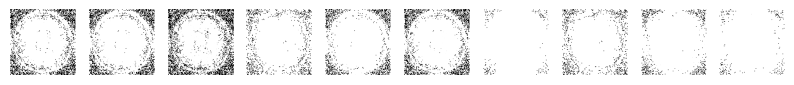

In [ ]:
# import os
# from PIL import Image
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras import layers,models
# import matplotlib.pyplot as plt
# from google.colab import drive
# from google.colab import files


# drive.mount('/content/drive')

# folder_path_positive = '/content/drive/MyDrive/BrainTumorDataset/TumorNegative'
# folder_path_negative = '/content/drive/MyDrive/BrainTumorDataset/TumorPositive'

# # Function to load images from a folder and resize them to 28x28 pixels
# def load_and_resize_images(folder_path):
#     images = []
#     for filename in os.listdir(folder_path):
#         img_path = os.path.join(folder_path, filename)
#         try:
#             with Image.open(img_path) as img:
#                 img = img.convert('L')  # Convert to grayscale
#                 img = img.resize((108, 108))  # Resize to 28x28 pixels
#                 img_array = np.array(img)  # Convert image to numpy array
#                 images.append(img_array)
#         except Exception as e:
#             print(f"Error processing {img_path}: {str(e)}")
#     return images

# # Load positive and negative tumor images
# positive_images = load_and_resize_images(folder_path_positive)
# negative_images = load_and_resize_images(folder_path_negative)

# # Store all images in a single array
# x_train = np.array(positive_images + negative_images)

# # Verify the shape of the array
# print("Shape of the array:", x_train.shape)



# latent_dim = 100
# lr = 0.0002
# beta1 = 0.5
# beta2 = 0.999
# num_epochs = 10
# batch_size = 32



# latent_dim = 100
# img_shape = (108, 108, 1)

# def build_generator(latent_dim):
#     model = models.Sequential()
#     model.add(layers.Dense(256, input_dim=latent_dim))
#     model.add(layers.LeakyReLU(alpha=0.2))
#     model.add(layers.BatchNormalization(momentum=0.8))

#     model.add(layers.Dense(512))
#     model.add(layers.LeakyReLU(alpha=0.2))
#     model.add(layers.BatchNormalization(momentum=0.8))

#     model.add(layers.Dense(1024))
#     model.add(layers.LeakyReLU(alpha=0.2))
#     model.add(layers.BatchNormalization(momentum=0.8))

#     model.add(layers.Dense(2048))
#     model.add(layers.LeakyReLU(alpha=0.2))
#     model.add(layers.BatchNormalization(momentum=0.8))

#     model.add(layers.Dense(np.prod((108, 108, 1)), activation='tanh'))
#     model.add(layers.Reshape((108, 108, 1)))

#     return model


# def build_discriminator(img_shape):
#     model = models.Sequential()
#     model.add(layers.Flatten(input_shape=img_shape))

#     model.add(layers.Dense(1024))
#     model.add(layers.LeakyReLU(alpha=0.2))

#     model.add(layers.Dense(512))
#     model.add(layers.LeakyReLU(alpha=0.2))

#     model.add(layers.Dense(256))
#     model.add(layers.LeakyReLU(alpha=0.2))

#     model.add(layers.Dense(1, activation='sigmoid'))

#     return model


# def build_gan(generator, discriminator):
#     discriminator.trainable = False
#     model = models.Sequential()
#     model.add(generator)
#     model.add(discriminator)
#     return model



# generator = build_generator(latent_dim)
# discriminator = build_discriminator(img_shape)
# discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# gan = build_gan(generator, discriminator)
# gan.compile(loss='binary_crossentropy', optimizer='adam')


# def train_gan(epochs, batch_size):
#     batch_count = x_train.shape[0] // batch_size

#     for epoch in range(epochs):
#         d_loss = 0
#         g_loss = 0

#         for _ in range(batch_count):
#             noise = np.random.normal(0, 1, (batch_size, latent_dim))
#             generated_images = generator.predict(noise)

#             idx = np.random.randint(0, x_train.shape[0], batch_size)
#             real_images = x_train[idx]

#             labels_real = np.ones((batch_size, 1))
#             labels_fake = np.zeros((batch_size, 1))

#             d_loss_real = discriminator.train_on_batch(real_images, labels_real)
#             d_loss_fake = discriminator.train_on_batch(generated_images, labels_fake)
#             d_loss += 0.5 * (np.mean(d_loss_real) + np.mean(d_loss_fake))

#             noise = np.random.normal(0, 1, (batch_size, latent_dim))
#             labels_gan = np.ones((batch_size, 1))
#             g_loss += gan.train_on_batch(noise, labels_gan)

#         if batch_count != 0:
#             d_loss /= batch_count
#             g_loss /= batch_count
#         else:
#             print("Warning: batch_count is zero. Skipping division by zero.")

#         print(f"Epoch {epoch}/{epochs} [D loss: {d_loss} | G loss: {g_loss}]")


# train_gan(epochs=100, batch_size=64)


# def generate_images(generator, latent_dim, num_images=10):
#     # Generate random noise vectors
#     noise = np.random.normal(0, 1, (num_images, latent_dim))

#     # Generate images using the generator
#     generated_images = generator.predict(noise)

#     return generated_images


# # Assuming you have already trained your GAN and have the trained models
# # generator, latent_dim, and other necessary variables defined

# # Generate images using the trained GAN
# num_generated_images = 10
# generated_images = generate_images(generator, latent_dim, num_generated_images)

# # Plot the generated images
# fig, axes = plt.subplots(1, num_generated_images, figsize=(10, 2))

# for i in range(num_generated_images):
#     axes[i].imshow(generated_images[i].reshape(108, 108), cmap='gray')
#     axes[i].axis('off')

# plt.show()

Mounted at /content/drive
Shape of the array: (3140, 108, 108)
2/2 [==============================] - 2s 828ms/step
Epoch 0/10 [D loss: 0.581647250463958 | G loss: 4.518613349418251]
2/2 [==============================] - 2s 859ms/step
Epoch 1/10 [D loss: 0.5780026182763749 | G loss: 4.743383411850248]
2/2 [==============================] - 2s 823ms/step
Epoch 2/10 [D loss: 0.5048181947390267 | G loss: 0.11055770640888689]
2/2 [==============================] - 2s 821ms/step
Epoch 3/10 [D loss: 0.5008921272789422 | G loss: 0.014640135887763178]
2/2 [==============================] - 2s 845ms/step
Epoch 4/10 [D loss: 0.5006157666792772 | G loss: 0.013278223792737236]
2/2 [==============================] - 2s 1s/step
Epoch 5/10 [D loss: 0.5002520339721834 | G loss: 0.008326125977446839]
2/2 [==============================] - 2s 838ms/step
Epoch 6/10 [D loss: 0.5001870345846834 | G loss: 0.008449240321559566]
2/2 [==============================] - 2s 799ms/step
Epoch 7/10 [D loss: 0.50013

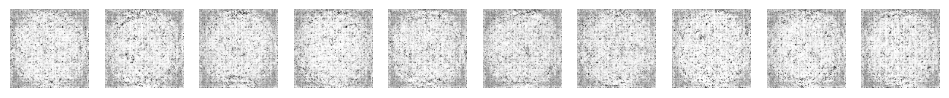

In [ ]:
import os
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import files

drive.mount('/content/drive')

folder_path_positive = '/content/drive/MyDrive/BrainTumorDataset/TumorNegative'
folder_path_negative = '/content/drive/MyDrive/BrainTumorDataset/TumorPositive'

# Function to load images from a folder and resize them to 28x28 pixels
def load_and_resize_images(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        try:
            with Image.open(img_path) as img:
                img = img.convert('L')  # Convert to grayscale
                img = img.resize((108, 108))  # Resize to 108x108 pixels
                img_array = np.array(img)  # Convert image to numpy array
                images.append(img_array)
        except Exception as e:
            print(f"Error processing {img_path}: {str(e)}")
    return images

# Load positive and negative tumor images
positive_images = load_and_resize_images(folder_path_positive)
negative_images = load_and_resize_images(folder_path_negative)

# Store all images in a single array
x_train = np.array(positive_images + negative_images)

# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0

# Verify the shape of the array
print("Shape of the array:", x_train.shape)

latent_dim = 100
lr = 0.0002
beta1 = 0.5
beta2 = 0.999
num_epochs = 10
batch_size = 64

# Add convolutional layers to the generator
def build_generator(latent_dim):
    model = models.Sequential()

    model.add(layers.Dense(256 * 27 * 27, input_dim=latent_dim))
    model.add(layers.Reshape((27, 27, 256)))
    model.add(layers.BatchNormalization(momentum=0.8))

    model.add(layers.Conv2DTranspose(128, kernel_size=3, strides=2, padding='same'))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.LeakyReLU(alpha=0.2))

    model.add(layers.Conv2DTranspose(64, kernel_size=3, strides=2, padding='same'))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.LeakyReLU(alpha=0.2))

    model.add(layers.Conv2DTranspose(1, kernel_size=3, strides=1, padding='same', activation='tanh'))

    return model

# Add convolutional layers to the discriminator
def build_discriminator(img_shape):
    model = models.Sequential()

    model.add(layers.Conv2D(64, kernel_size=3, strides=2, input_shape=img_shape, padding='same'))
    model.add(layers.LeakyReLU(alpha=0.2))

    model.add(layers.Conv2D(128, kernel_size=3, strides=2, padding='same'))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.LeakyReLU(alpha=0.2))

    model.add(layers.Conv2D(256, kernel_size=3, strides=2, padding='same'))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.LeakyReLU(alpha=0.2))

    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

# Build and compile the models
generator = build_generator(latent_dim)
discriminator = build_discriminator((108, 108, 1))

discriminator.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr, beta_1=beta1, beta_2=beta2), metrics=['accuracy'])

# Build the GAN model
discriminator.trainable = False
gan = models.Sequential([generator, discriminator])
gan.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr, beta_1=beta1, beta_2=beta2))

# Training loop
def train_gan(epochs, batch_size):
    batch_count = x_train.shape[0] // batch_size

    for epoch in range(epochs):
        d_loss = 0
        g_loss = 0

        for _ in range(batch_count):
            noise = np.random.normal(0, 1, (batch_size, latent_dim))
            generated_images = generator.predict(noise)

            idx = np.random.randint(0, x_train.shape[0], batch_size)
            real_images = x_train[idx]

            labels_real = np.ones((batch_size, 1))
            labels_fake = np.zeros((batch_size, 1))

            d_loss_real = discriminator.train_on_batch(real_images, labels_real)
            d_loss_fake = discriminator.train_on_batch(generated_images, labels_fake)
            d_loss += 0.5 * (np.mean(d_loss_real) + np.mean(d_loss_fake))

            noise = np.random.normal(0, 1, (batch_size, latent_dim))
            labels_gan = np.ones((batch_size, 1))
            g_loss += gan.train_on_batch(noise, labels_gan)

        if batch_count != 0:
            d_loss /= batch_count
            g_loss /= batch_count
        else:
            print("Warning: batch_count is zero. Skipping division by zero.")

        print(f"Epoch {epoch}/{epochs} [D loss: {d_loss} | G loss: {g_loss}]")

# Train the GAN
train_gan(epochs=num_epochs, batch_size=batch_size)

def generate_images(generator, latent_dim, num_images=10):
    # Generate random noise vectors
    noise = np.random.normal(0, 1, (num_images, latent_dim))

    # Generate images using the generator
    generated_images = generator.predict(noise)

    return generated_images
# Generate and plot images
num_generated_images = 10
generated_images = generate_images(generator, latent_dim, num_generated_images)

fig, axes = plt.subplots(1, num_generated_images, figsize=(12, 2))

for i in range(num_generated_images):
    axes[i].imshow(generated_images[i].reshape(108, 108), cmap='gray')
    axes[i].axis('off')

plt.show()


In [ ]:
import os
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import files

drive.mount('/content/drive')

folder_path_positive = '/content/drive/MyDrive/BrainTumorDataset/TumorNegative'
folder_path_negative = '/content/drive/MyDrive/BrainTumorDataset/TumorPositive'

# Function to load images from a folder and resize them to 28x28 pixels
def load_and_resize_images(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        try:
            with Image.open(img_path) as img:
                img = img.convert('L')  # Convert to grayscale
                img = img.resize((108, 108))  # Resize to 108x108 pixels
                img_array = np.array(img)  # Convert image to numpy array
                images.append(img_array)
        except Exception as e:
            print(f"Error processing {img_path}: {str(e)}")
    return images

# Load positive and negative tumor images
positive_images = load_and_resize_images(folder_path_positive)
negative_images = load_and_resize_images(folder_path_negative)

# Store all images in a single array
x_train = np.array(positive_images + negative_images)

# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0

# Verify the shape of the array
print("Shape of the array:", x_train.shape)

latent_dim = 100
lr = 0.0002
beta1 = 0.5
beta2 = 0.999
num_epochs = 10
batch_size = 64

def build_generator(latent_dim):
    model = models.Sequential()

    model.add(layers.Dense(512 * 27 * 27, input_dim=latent_dim))
    model.add(layers.Reshape((27, 27, 512)))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Activation('relu'))

    model.add(layers.Flatten())
    model.add(layers.Dense(108 * 108 * 1, activation='tanh'))
    model.add(layers.Reshape((108, 108, 1)))

    return model


def build_discriminator(img_shape):
    model = models.Sequential()

    model.add(layers.Flatten(input_shape=img_shape))
    model.add(layers.Dense(512))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Activation('relu'))

    model.add(layers.Dense(256))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Activation('relu'))

    model.add(layers.Dense(1, activation='sigmoid'))

    return model

# Build and compile the models
generator = build_generator(latent_dim)
discriminator = build_discriminator((108, 108, 1))

discriminator.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr, beta_1=beta1, beta_2=beta2), metrics=['accuracy'])

# Build the GAN model
discriminator.trainable = False
gan = models.Sequential([generator, discriminator])
gan.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr, beta_1=beta1, beta_2=beta2))

# Training loop
def train_gan(epochs, batch_size):
    batch_count = x_train.shape[0] // batch_size

    for epoch in range(epochs):
        d_loss = 0
        g_loss = 0

        for _ in range(batch_count):
            noise = np.random.normal(0, 1, (batch_size, latent_dim))
            generated_images = generator.predict(noise)

            idx = np.random.randint(0, x_train.shape[0], batch_size)
            real_images = x_train[idx]

            labels_real = np.ones((batch_size, 1))
            labels_fake = np.zeros((batch_size, 1))

            d_loss_real = discriminator.train_on_batch(real_images, labels_real)
            d_loss_fake = discriminator.train_on_batch(generated_images, labels_fake)
            d_loss += 0.5 * (np.mean(d_loss_real) + np.mean(d_loss_fake))

            noise = np.random.normal(0, 1, (batch_size, latent_dim))
            labels_gan = np.ones((batch_size, 1))
            g_loss += gan.train_on_batch(noise, labels_gan)

        if batch_count != 0:
            d_loss /= batch_count
            g_loss /= batch_count
        else:
            print("Warning: batch_count is zero. Skipping division by zero.")

        print(f"Epoch {epoch}/{epochs} [D loss: {d_loss} | G loss: {g_loss}]")

# Train the GAN
train_gan(epochs=num_epochs, batch_size=batch_size)

def generate_images(generator, latent_dim, num_images=10):
    # Generate random noise vectors
    noise = np.random.normal(0, 1, (num_images, latent_dim))

    # Generate images using the generator
    generated_images = generator.predict(noise)

    return generated_images
# Generate and plot images
num_generated_images = 10
generated_images = generate_images(generator, latent_dim, num_generated_images)

fig, axes = plt.subplots(1, num_generated_images, figsize=(12, 2))

for i in range(num_generated_images):
    axes[i].imshow(generated_images[i].reshape(108, 108), cmap='gray')
    axes[i].axis('off')

plt.show()




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Shape of the array: (3140, 108, 108)


In [ ]:
import os
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from google.colab import drive
import shutil
from IPython.display import FileLink

drive.mount('/content/drive')

folder_path_positive = '/content/drive/MyDrive/BrainTumorDataset/TumorNegative'
folder_path_negative = '/content/drive/MyDrive/BrainTumorDataset/TumorPositive'


def load_and_resize_images(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        try:
            with Image.open(img_path) as img:
                img = img.convert('L')
                img = img.resize((108, 108))
                img_array = np.array(img)
                images.append(img_array)
        except Exception as e:
            print(f"Error processing {img_path}: {str(e)}")
    return images


positive_images = load_and_resize_images(folder_path_positive)
negative_images = load_and_resize_images(folder_path_negative)


x_train = np.array(positive_images + negative_images)


x_train = x_train.astype('float32') / 255.0


x_train_flat = x_train.reshape((x_train.shape[0], -1))


print("Shape of the array:", x_train_flat.shape)


original_dim = 108 * 108
intermediate_dim = 256
latent_dim = 100


inputs = tf.keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_var = layers.Dense(latent_dim)(h)


def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

encoder = tf.keras.Model(inputs, [z_mean, z_log_var, z])


decoder_h = layers.Dense(intermediate_dim, activation='relu')
decoder_mean = layers.Dense(original_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

vae = tf.keras.Model(inputs, x_decoded_mean)


kl_loss = -0.5 * tf.reduce_mean(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
mse_loss = tf.keras.losses.mean_squared_error(inputs, x_decoded_mean)
mse_loss *= original_dim
vae_loss = tf.keras.backend.mean(mse_loss + kl_loss)



vae.add_loss(vae_loss)
vae.compile(optimizer='adam')


elbo_value = vae.evaluate(x_train_flat, x_train_flat, batch_size=batch_size)
print("ELBO:", elbo_value)


num_epochs = 200
batch_size = 64

history = vae.fit(x_train_flat, epochs=num_epochs, batch_size=batch_size)


num_generated_images = 10
encoded_images = encoder.predict(x_train_flat[:num_generated_images])[2]
decoded_images = vae.predict(x_train_flat[:num_generated_images])

output_folder = '/content/generated_images'

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for i in range(num_generated_images):
    img_array = (decoded_images[i] * 255).astype(np.uint8)
    img = Image.fromarray(img_array.reshape(108, 108))
    img_path = os.path.join(output_folder, f'generated_image_{i + 1}.png')
    img.save(img_path)


shutil.make_archive('/content/generated_images', 'zip', output_folder)


FileLink(r'/content/generated_images.zip')

print("Encoder Summary:")
encoder.summary()

print("\nVAE Summary:")
vae.summary()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Shape of the array: (3140, 11664)
50/50 [==============================] - 0s 4ms/step - loss: 1443.8285
ELBO: 1443.8284912109375
Epoch 1/200
50/50 [==============================] - 2s 6ms/step - loss: 632.5043
Epoch 2/200
50/50 [==============================] - 0s 7ms/step - loss: 467.2396
Epoch 3/200
50/50 [==============================] - 0s 7ms/step - loss: 417.4544
Epoch 4/200
50/50 [==============================] - 0s 7ms/step - loss: 388.4678
Epoch 5/200
50/50 [==============================] - 0s 6ms/step - loss: 350.4893
Epoch 6/200
50/50 [==============================] - 0s 7ms/step - loss: 333.1875
Epoch 7/200
50/50 [==============================] - 0s 7ms/step - loss: 313.4080
Epoch 8/200
50/50 [==============================] - 0s 7ms/step - loss: 297.0102
Epoch 9/200
50/50 [==============================] - 0s 7ms/step - loss: 289.0472
Epo